In [176]:
import numpy
filename = '/home/shreeya/ml_library/data/iris-normalise-1.csv'
raw_data = open(filename,'rt')
data = numpy.loadtxt(raw_data,delimiter=",")

In [177]:
#split into training and test dataset
numpy.random.shuffle(data)
trainingData, testData = data[:60,:],data[60:,:]
print("Training data shape:", trainingData.shape)
print("Test data shape:", testData.shape)

Training data shape: (60, 5)
Test data shape: (40, 5)


In [178]:
theta0 = 0.0
updatedTheta0 = 0.0
m = trainingData.shape[0]
print('train m = ', m)
n = trainingData.shape[1]
print('train n = ', n)
theta1 = numpy.zeros((n-1,1))
updatedTheta1 = numpy.zeros((n-1,1))
print('Initial theta0 = ', theta0)
print('Initial theta1 = ', numpy.transpose(theta1))
alpha = 0.3
print('alpha = ', alpha)

train m =  60
train n =  5
Initial theta0 =  0.0
Initial theta1 =  [[0. 0. 0. 0.]]
alpha =  0.3


In [179]:
import math
def predict(theta0, theta1, dataForPred):
    predict = 0.0
    predict = theta0
    for j in range(n-1):
        predict = predict + (theta1[j]*dataForPred[j])
    predict = 1 / (1 + math.exp(-predict))
    return predict

In [180]:
#crisp predictions
def crispPredictions(predict):
    print(predict)
    if(predict < 0.5):
        crispPredict = 0
    else:
        crispPredict = 1
    return crispPredict

In [181]:
#test data for prediction
def testDataPrediction():
    testm = testData.shape[0]
    testn = testData.shape[1]
    print('test m =', testm)
    print('test n =', testn)
    testInstance = numpy.zeros((1,n-1))
    correct = 0
    if(testn != n):
        print('Unequal number of features in train & testdata')
    else:
        for testi in range(testm-1):
            testInstance = testData[testi][0:testn-1]
            testPredict = predict(theta0, theta1, testInstance)
            cp = crispPredictions(testPredict)
            print('Crisp Prediction by the algorithm = ', cp)
            actualTestPredict = testData[testi][testn-1]
            print('Actual value = ', actualTestPredict)
            if(cp == actualTestPredict):
                correct = correct +1
        print('Correct = ', correct)
        accuracy = (correct / testm) * 100
        print('Accuracy =',accuracy)
        return accuracy

In [182]:
#Stochastic Gradiant 
cost = 0.0
minCost = 0.0
error = 0.0
predictedY = 0.0
epochs = 4
trainingInstance = numpy.zeros((1,n-1))
accuracyArr = numpy.zeros((epochs))
print(trainingInstance)
print(accuracyArr)

for begin in range(epochs):
    for i in range(m-1):
        trainingInstance = trainingData[i][0:n-1]
        predictedY = predict(theta0, theta1, trainingInstance)
        error = trainingData[i][n-1] - predictedY
        updatedTheta0 = theta0 + alpha * error * predictedY * (1-predictedY)
        for j in range(n-1):
            updatedTheta1[j] = theta1[j] + alpha * error * predictedY * (1-predictedY) * trainingInstance[j]
        theta0 = updatedTheta0
        theta1 = updatedTheta1
        print('theta values = ', theta0, '\t' ,numpy.transpose(theta1))
    acc = testDataPrediction()
    print(begin)
    accuracyArr[begin] = acc
    print(accuracyArr)
print(accuracyArr)
print('\n')

[[0. 0. 0. 0.]]
[0. 0. 0. 0.]
theta values =  0.0375 	 [[0.02737215 0.01466366 0.02004034 0.00635426]]
theta values =  -0.0013076308192055061 	 [[-0.00456932 -0.00529976  0.01072406  0.00568883]]
theta values =  -0.03871190474648596 	 [[-0.03374874 -0.02686718  0.00184335  0.00378581]]
theta values =  0.00011295319069962173 	 [[-0.00320619 -0.0129355   0.02059754  0.00914415]]
theta values =  0.03750199173703931 	 [[0.02388598 0.00113161 0.04091669 0.01643819]]
theta values =  -0.0012264501031268166 	 [[-0.00736121 -0.01969984  0.03159735  0.01479358]]
theta values =  -0.03855733947685371 	 [[-0.03722704 -0.03982683  0.02185851  0.01349507]]
theta values =  -0.07439136584949826 	 [[-0.0655705  -0.06023413  0.01392234  0.01236131]]
theta values =  -0.034583507467341526 	 [[-0.03797036 -0.0449007   0.03692245  0.02002803]]
theta values =  0.003880802443370475 	 [[-0.01014639 -0.03174756  0.05918163  0.0260987 ]]
theta values =  0.04098661858175976 	 [[ 0.01742872 -0.01820189  0.07901636 

[47.5 97.5 97.5 97.5]
[1 2 3 4]


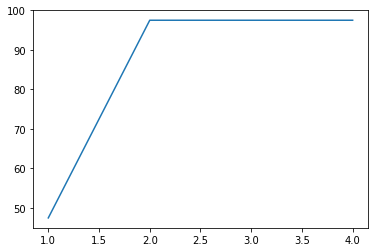

In [183]:
import matplotlib.pyplot as plt
epochsArr = numpy.array(range(epochs))
epochsArr += 1
print(accuracyArr)
print(epochsArr)
plt.plot(epochsArr, accuracyArr)